In [2]:
import pandas as pd
import numpy as np


In [3]:
train = pd.read_csv('C:\\Projects\\dataverse-nsut\\Round 2\\data\\main.csv')
test = pd.read_csv('C:\\Projects\\dataverse-nsut\\Round 2\\data\\test.csv')


In [4]:
train.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
display(train.shape)
display(train.info())
display(train.describe())


(70000, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\2387485930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='cardio', palette='Set2')


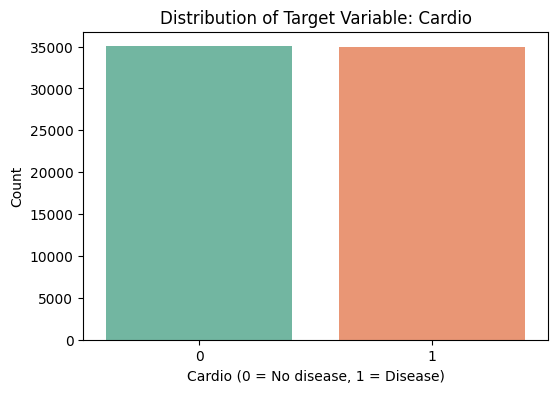

,proportion
cardio,
0,0.5003
1,0.4997


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='cardio', palette='Set2')
plt.title('Distribution of Target Variable: Cardio')
plt.xlabel('Cardio (0 = No disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()
display(train['cardio'].value_counts(normalize=True).rename('proportion').to_frame())


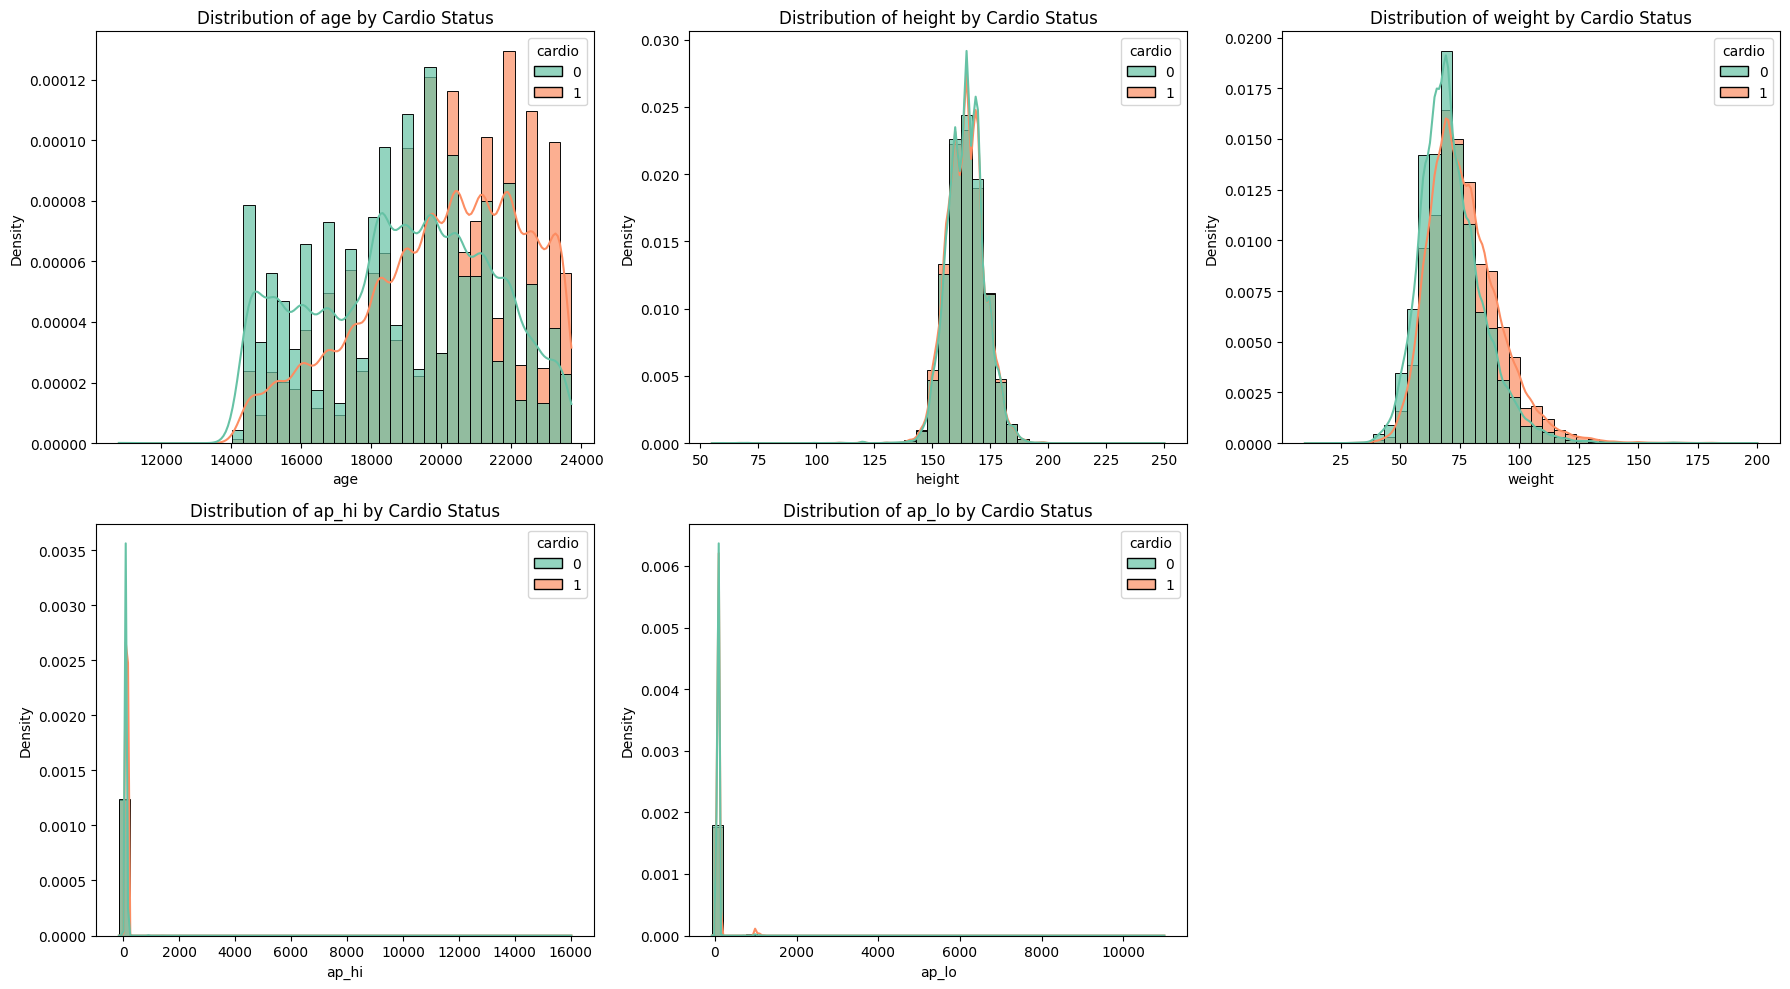

In [7]:
num_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
plt.figure(figsize=(18, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=train, x=col, hue='cardio', kde=True, bins=40, palette='Set2', stat='density', alpha=0.7)
    plt.title(f'Distribution of {col} by Cardio Status')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


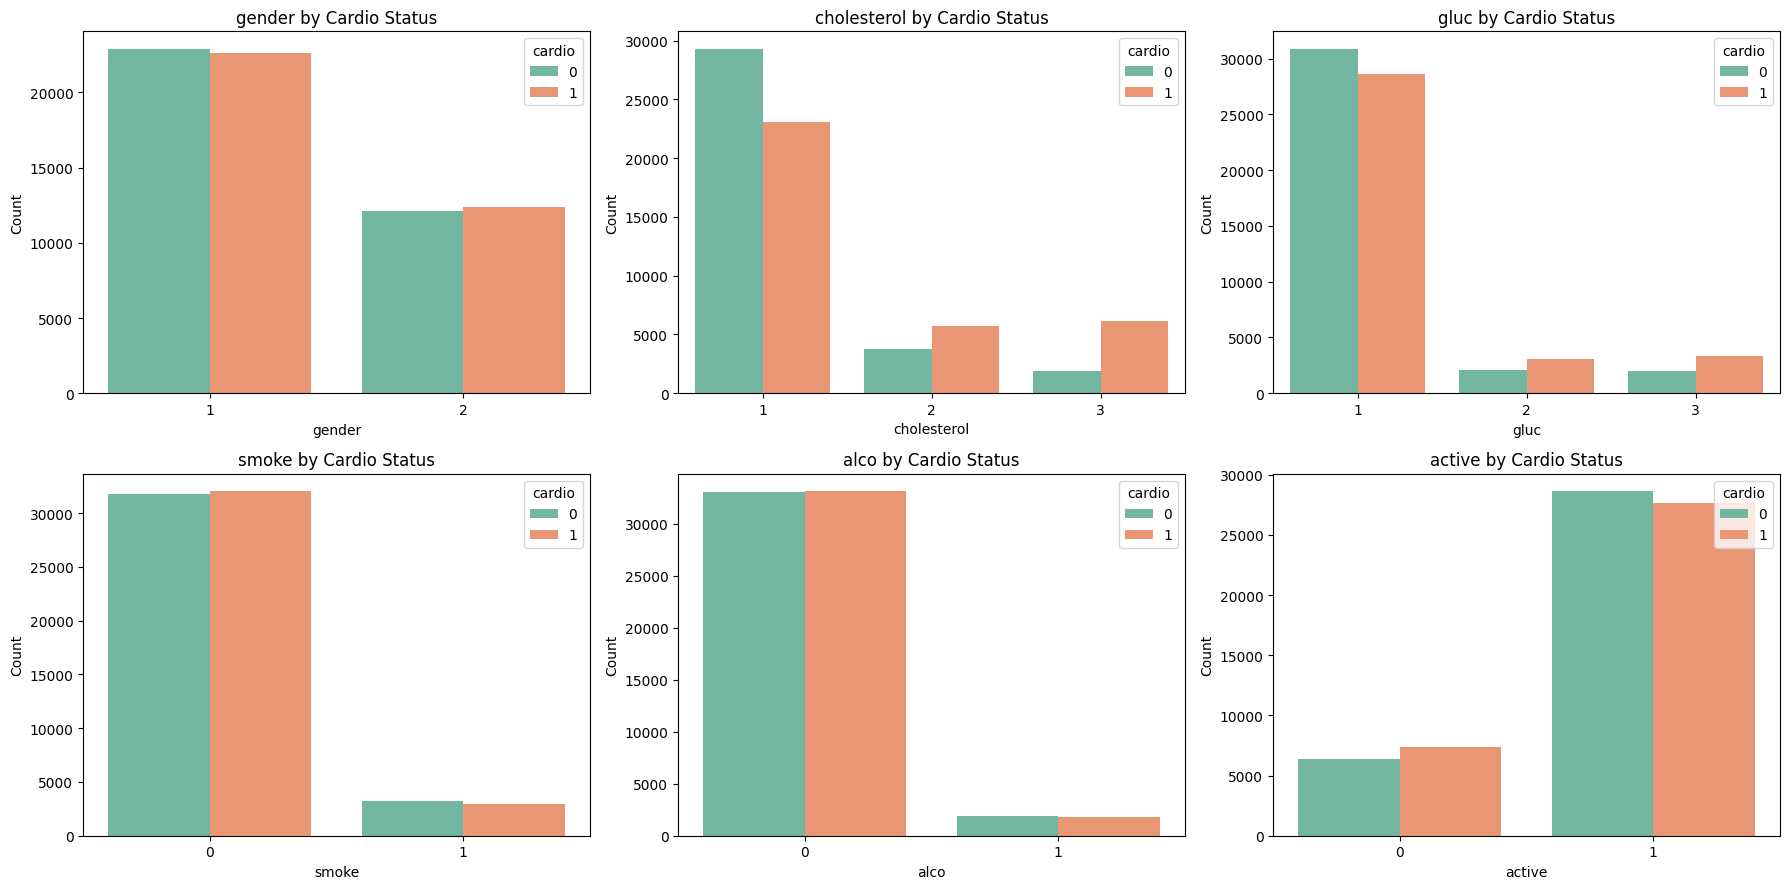

In [8]:
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
for ax, col in zip(axes.flat, cat_features):
    sns.countplot(data=train, x=col, hue='cardio', palette='Set2', ax=ax)
    ax.set_title(f'{col} by Cardio Status')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='cardio', loc='upper right')
plt.tight_layout()
plt.show()


In [9]:
train['age_years'] = train['age'] // 365
train['bmi'] = train['weight'] / (train['height'] / 100) ** 2
train['pulse_pressure'] = train['ap_hi'] - train['ap_lo']
train['bp_high'] = ((train['ap_hi'] >= 140) | (train['ap_lo'] >= 90)).astype(int)
train['bp_low'] = ((train['ap_hi'] < 90) | (train['ap_lo'] < 60)).astype(int)
train[['age_years', 'bmi', 'pulse_pressure', 'bp_high', 'bp_low']].describe()


,age_years,bmi,pulse_pressure,bp_high,bp_low
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,27.556513,32.186871,0.352929,0.006786
std,6.766774,6.091511,241.469638,0.477884,0.082096
min,29.000000,3.471784,-10800.000000,0.000000,0.000000
25%,48.000000,23.875115,40.000000,0.000000,0.000000
50%,53.000000,26.374068,40.000000,0.000000,0.000000
75%,58.000000,30.222222,50.000000,1.000000,0.000000
max,64.000000,298.666667,15940.000000,1.000000,1.000000


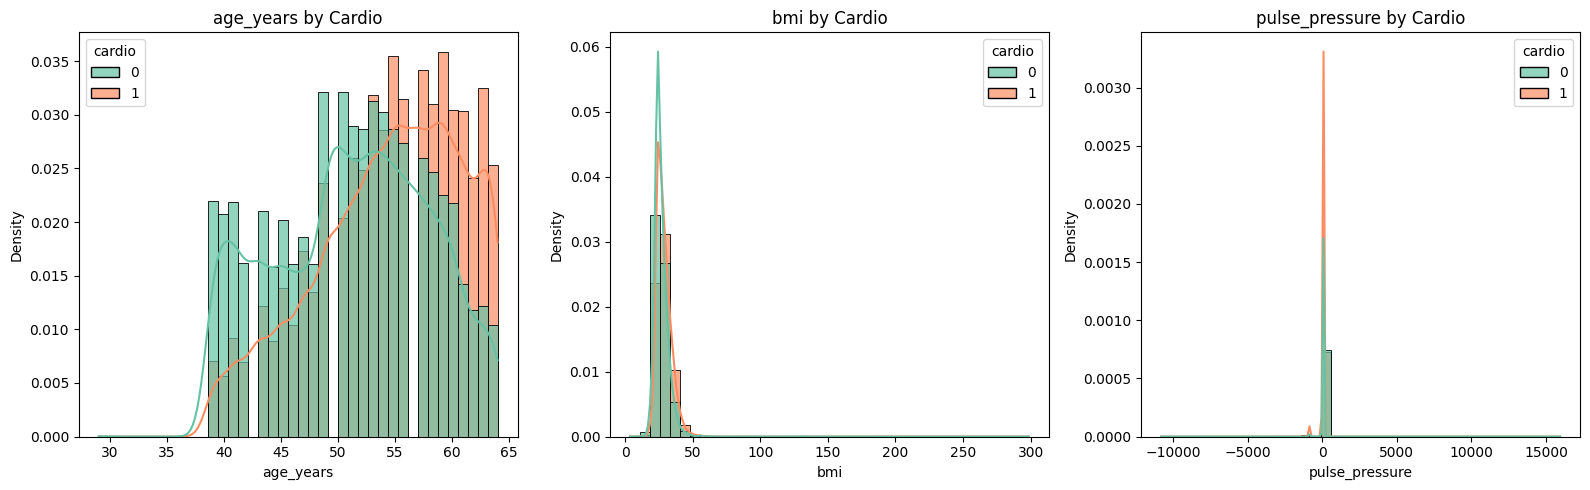

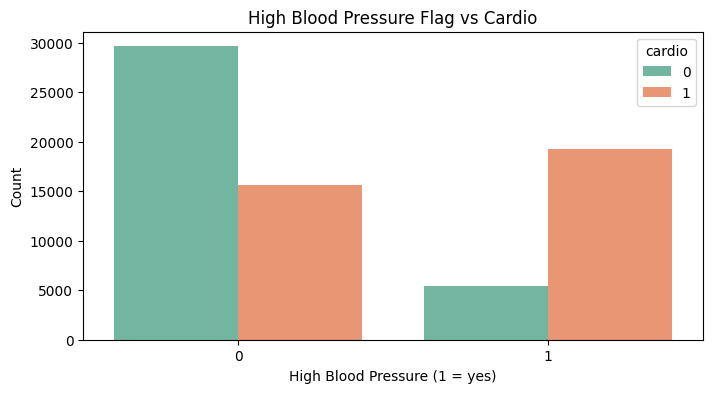

In [10]:
feats = ['age_years', 'bmi', 'pulse_pressure']
plt.figure(figsize=(16, 5))
for i, col in enumerate(feats, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=train, x=col, hue='cardio', kde=True, stat='density', bins=40, palette='Set2', alpha=0.7)
    plt.title(f'{col} by Cardio')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x='bp_high', hue='cardio', palette='Set2')
plt.title('High Blood Pressure Flag vs Cardio')
plt.xlabel('High Blood Pressure (1 = yes)')
plt.ylabel('Count')
plt.show()


C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\2177236505.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


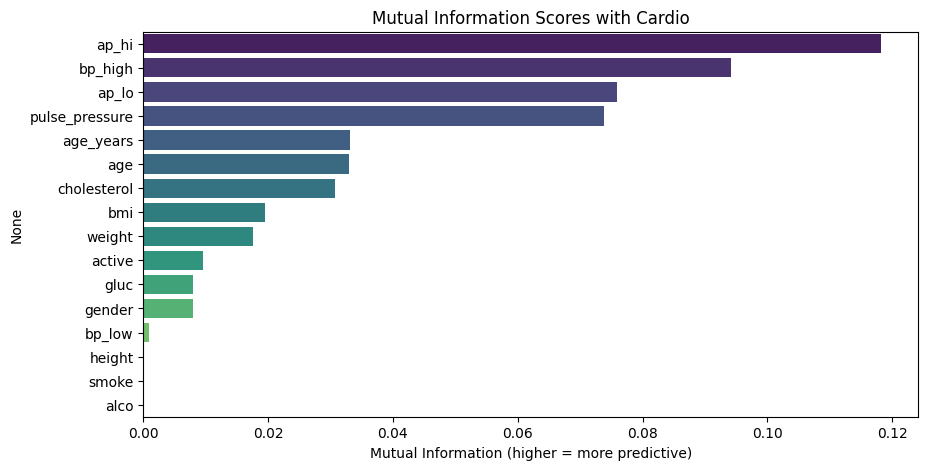

,mutual_information
ap_hi,0.118279
bp_high,0.094167
ap_lo,0.075966
pulse_pressure,0.073831
age_years,0.033116
age,0.032894
cholesterol,0.030680
bmi,0.019482
weight,0.017561
active,0.009507


In [11]:
from sklearn.feature_selection import mutual_info_classif
features = [col for col in train.columns if col not in ['id', 'cardio']]
X = train[features]
y = train['cardio']
X = X.fillna(-999)
mi = mutual_info_classif(X, y, random_state=42, discrete_features='auto')
mi_series = pd.Series(mi, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title('Mutual Information Scores with Cardio')
plt.xlabel('Mutual Information (higher = more predictive)')
plt.show()
mi_series.to_frame('mutual_information')


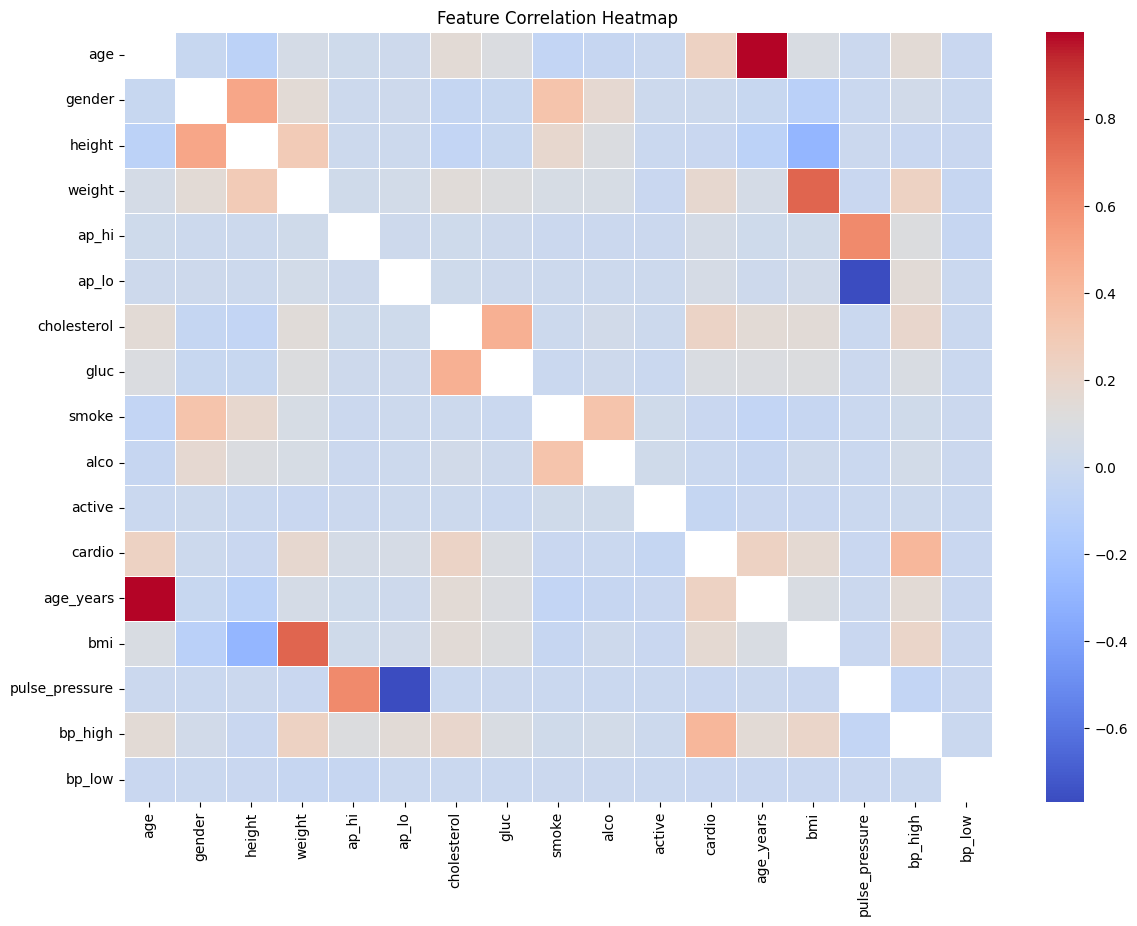

In [12]:
corr = train.drop(columns=['id']).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm', mask=np.eye(len(corr)), linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


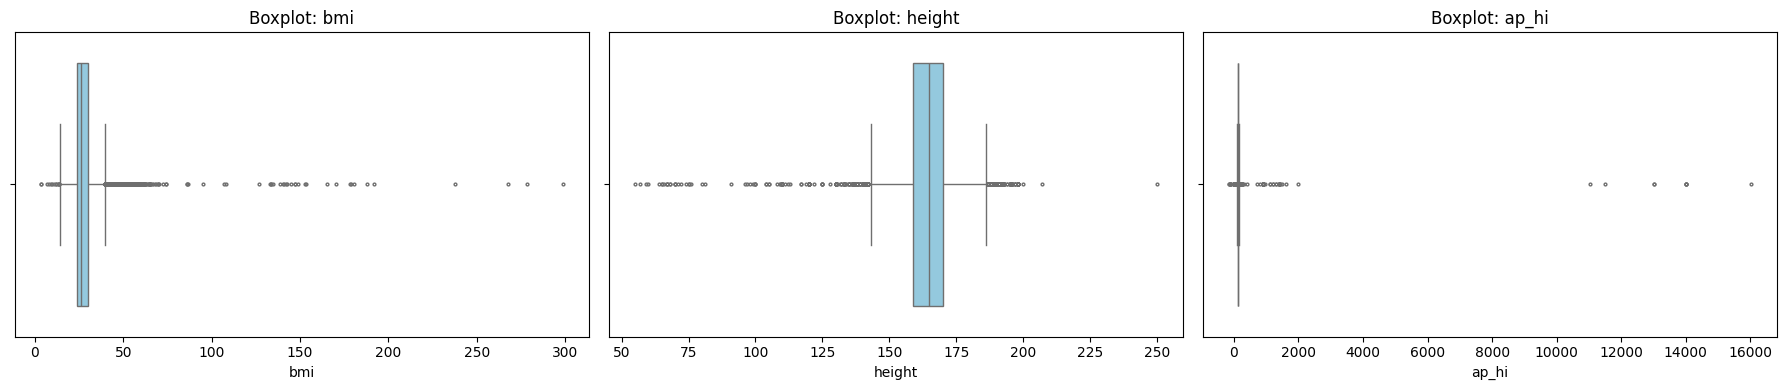

bmi_outlier
0    68603
1     1397
Name: count, dtype: int64

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ax, col in zip(axes, ['bmi', 'height', 'ap_hi']):
    sns.boxplot(x=train[col], ax=ax, orient='h', color='skyblue', fliersize=2, linewidth=1)
    ax.set_title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()
q_low, q_hi = train['bmi'].quantile([0.01, 0.99])
outlier_mask = (train['bmi'] < q_low) | (train['bmi'] > q_hi)
train['bmi_outlier'] = outlier_mask.astype(int)
display(train['bmi_outlier'].value_counts())


In [14]:
train['ap_hi_to_lo'] = train['ap_hi'] / (train['ap_lo'] + 1e-06)
train['bmi_chol_interact'] = train['bmi'] * train['cholesterol']
mean_chol = train['cholesterol'].mean()
train['chol_m_diff'] = train['cholesterol'] - mean_chol
train['age_bmi_interact'] = train['age_years'] * train['bmi']
train[['ap_hi_to_lo', 'bmi_chol_interact', 'chol_m_diff', 'age_bmi_interact']].describe()


,ap_hi_to_lo,bmi_chol_interact,chol_m_diff,age_bmi_interact
count,7.000000e+04,70000.000000,7.000000e+04,70000.000000
mean,1.034301e+05,38.272310,4.182052e-17,1459.624926
std,8.500280e+06,22.954181,6.802503e-01,386.291522
min,-1.875000e+00,3.471784,-3.668714e-01,187.327824
25%,1.500000e+00,24.243918,-3.668714e-01,1211.911357
50%,1.500000e+00,28.027682,-3.668714e-01,1411.015020
75%,1.625000e+00,43.262298,6.331286e-01,1652.379426
max,9.070000e+08,834.375000,1.633129e+00,17137.190083


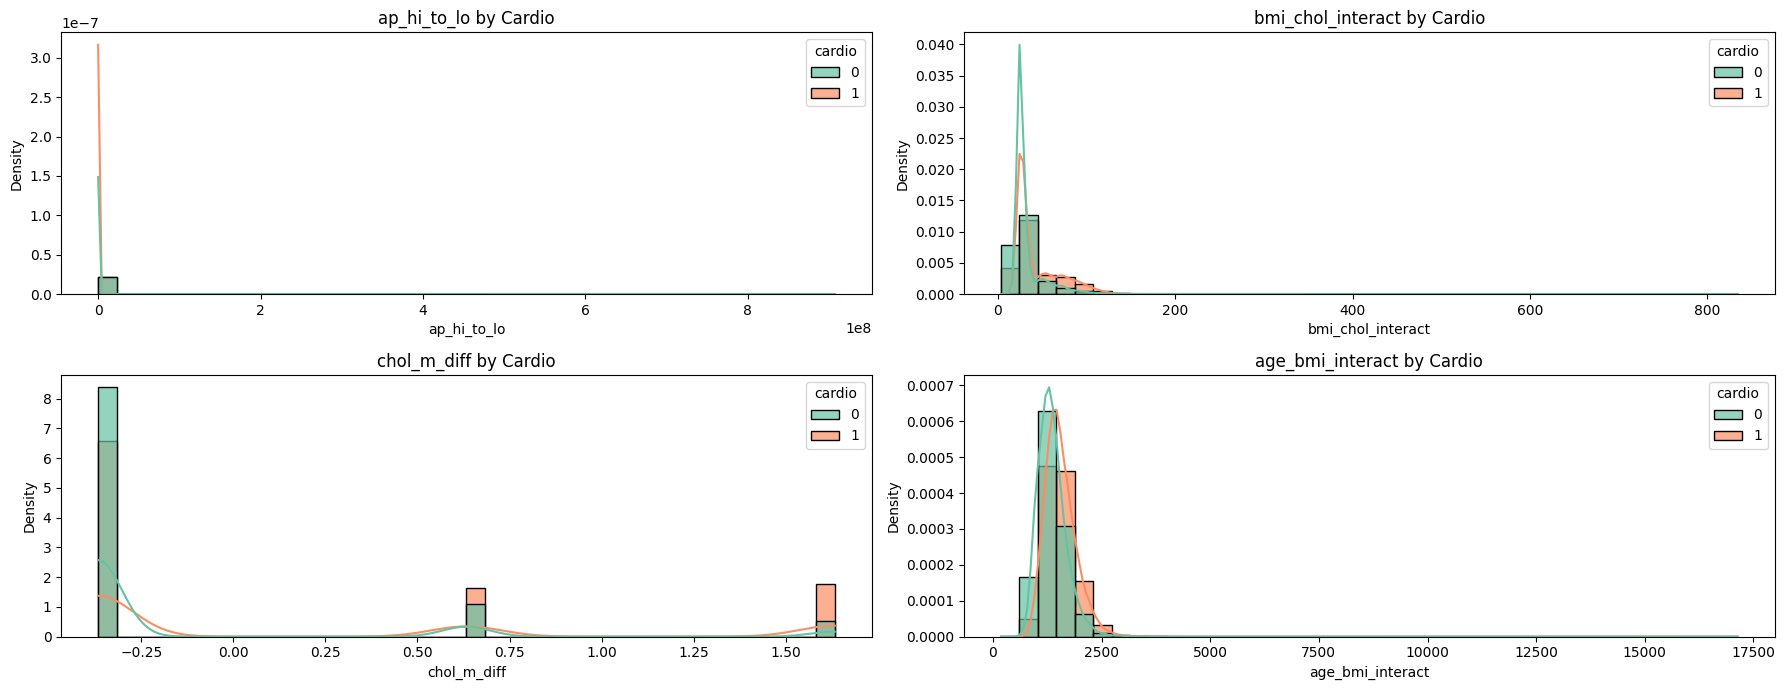

In [15]:
inter_feats = ['ap_hi_to_lo', 'bmi_chol_interact', 'chol_m_diff', 'age_bmi_interact']
plt.figure(figsize=(18, 7))
for i, col in enumerate(inter_feats, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=train, x=col, hue='cardio', bins=40, stat='density', kde=True, palette='Set2', alpha=0.7)
    plt.title(f'{col} by Cardio')
plt.tight_layout()
plt.show()


C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\1913214047.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_v2_series.values, y=mi_v2_series.index, palette='viridis')


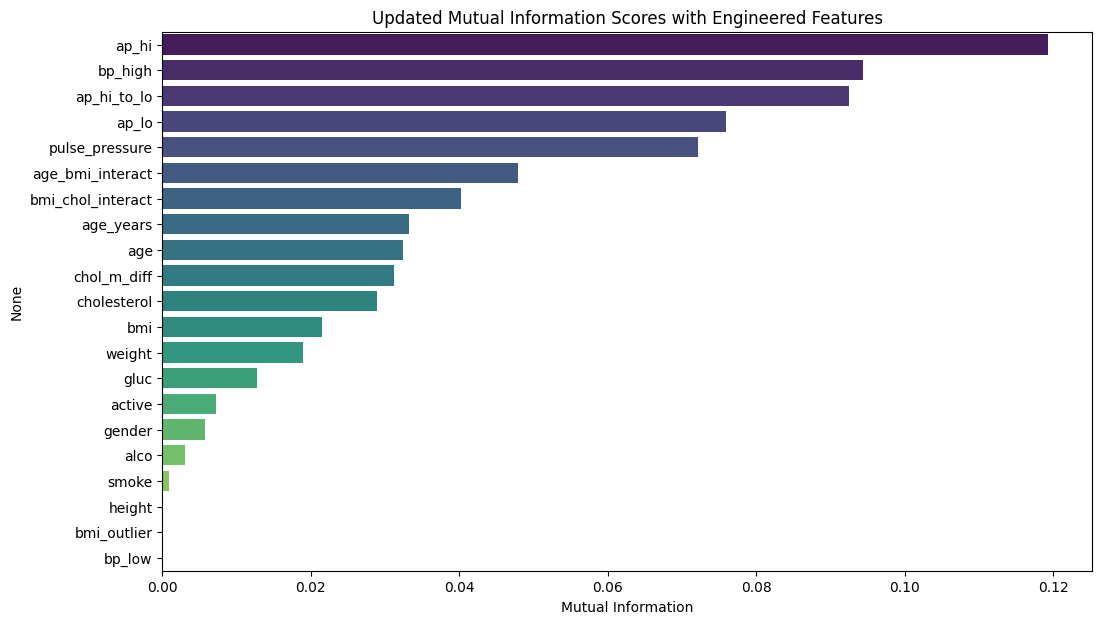

,mutual_information
ap_hi,0.119312
bp_high,0.094319
ap_hi_to_lo,0.092521
ap_lo,0.075864
pulse_pressure,0.072169
age_bmi_interact,0.047934
bmi_chol_interact,0.040167
age_years,0.033247
age,0.032413
chol_m_diff,0.031209


In [16]:
from sklearn.feature_selection import mutual_info_classif
engineered_features = [col for col in train.columns if col not in ['id', 'cardio']]
X = train[engineered_features].fillna(-999)
y = train['cardio']
mi_v2 = mutual_info_classif(X, y, random_state=42, discrete_features='auto')
mi_v2_series = pd.Series(mi_v2, index=engineered_features).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=mi_v2_series.values, y=mi_v2_series.index, palette='viridis')
plt.title('Updated Mutual Information Scores with Engineered Features')
plt.xlabel('Mutual Information')
plt.show()
mi_v2_series.to_frame('mutual_information')


C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\3922039245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='cardio', y=col, ax=axes[i], palette='Set2', fliersize=2)
C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\3922039245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='cardio', y=col, ax=axes[i], palette='Set2', fliersize=2)
C:\Users\Shiven\AppData\Local\Temp\ipykernel_34760\3922039245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='cardio', y=col, ax=axes[i], palette='Set2', fl

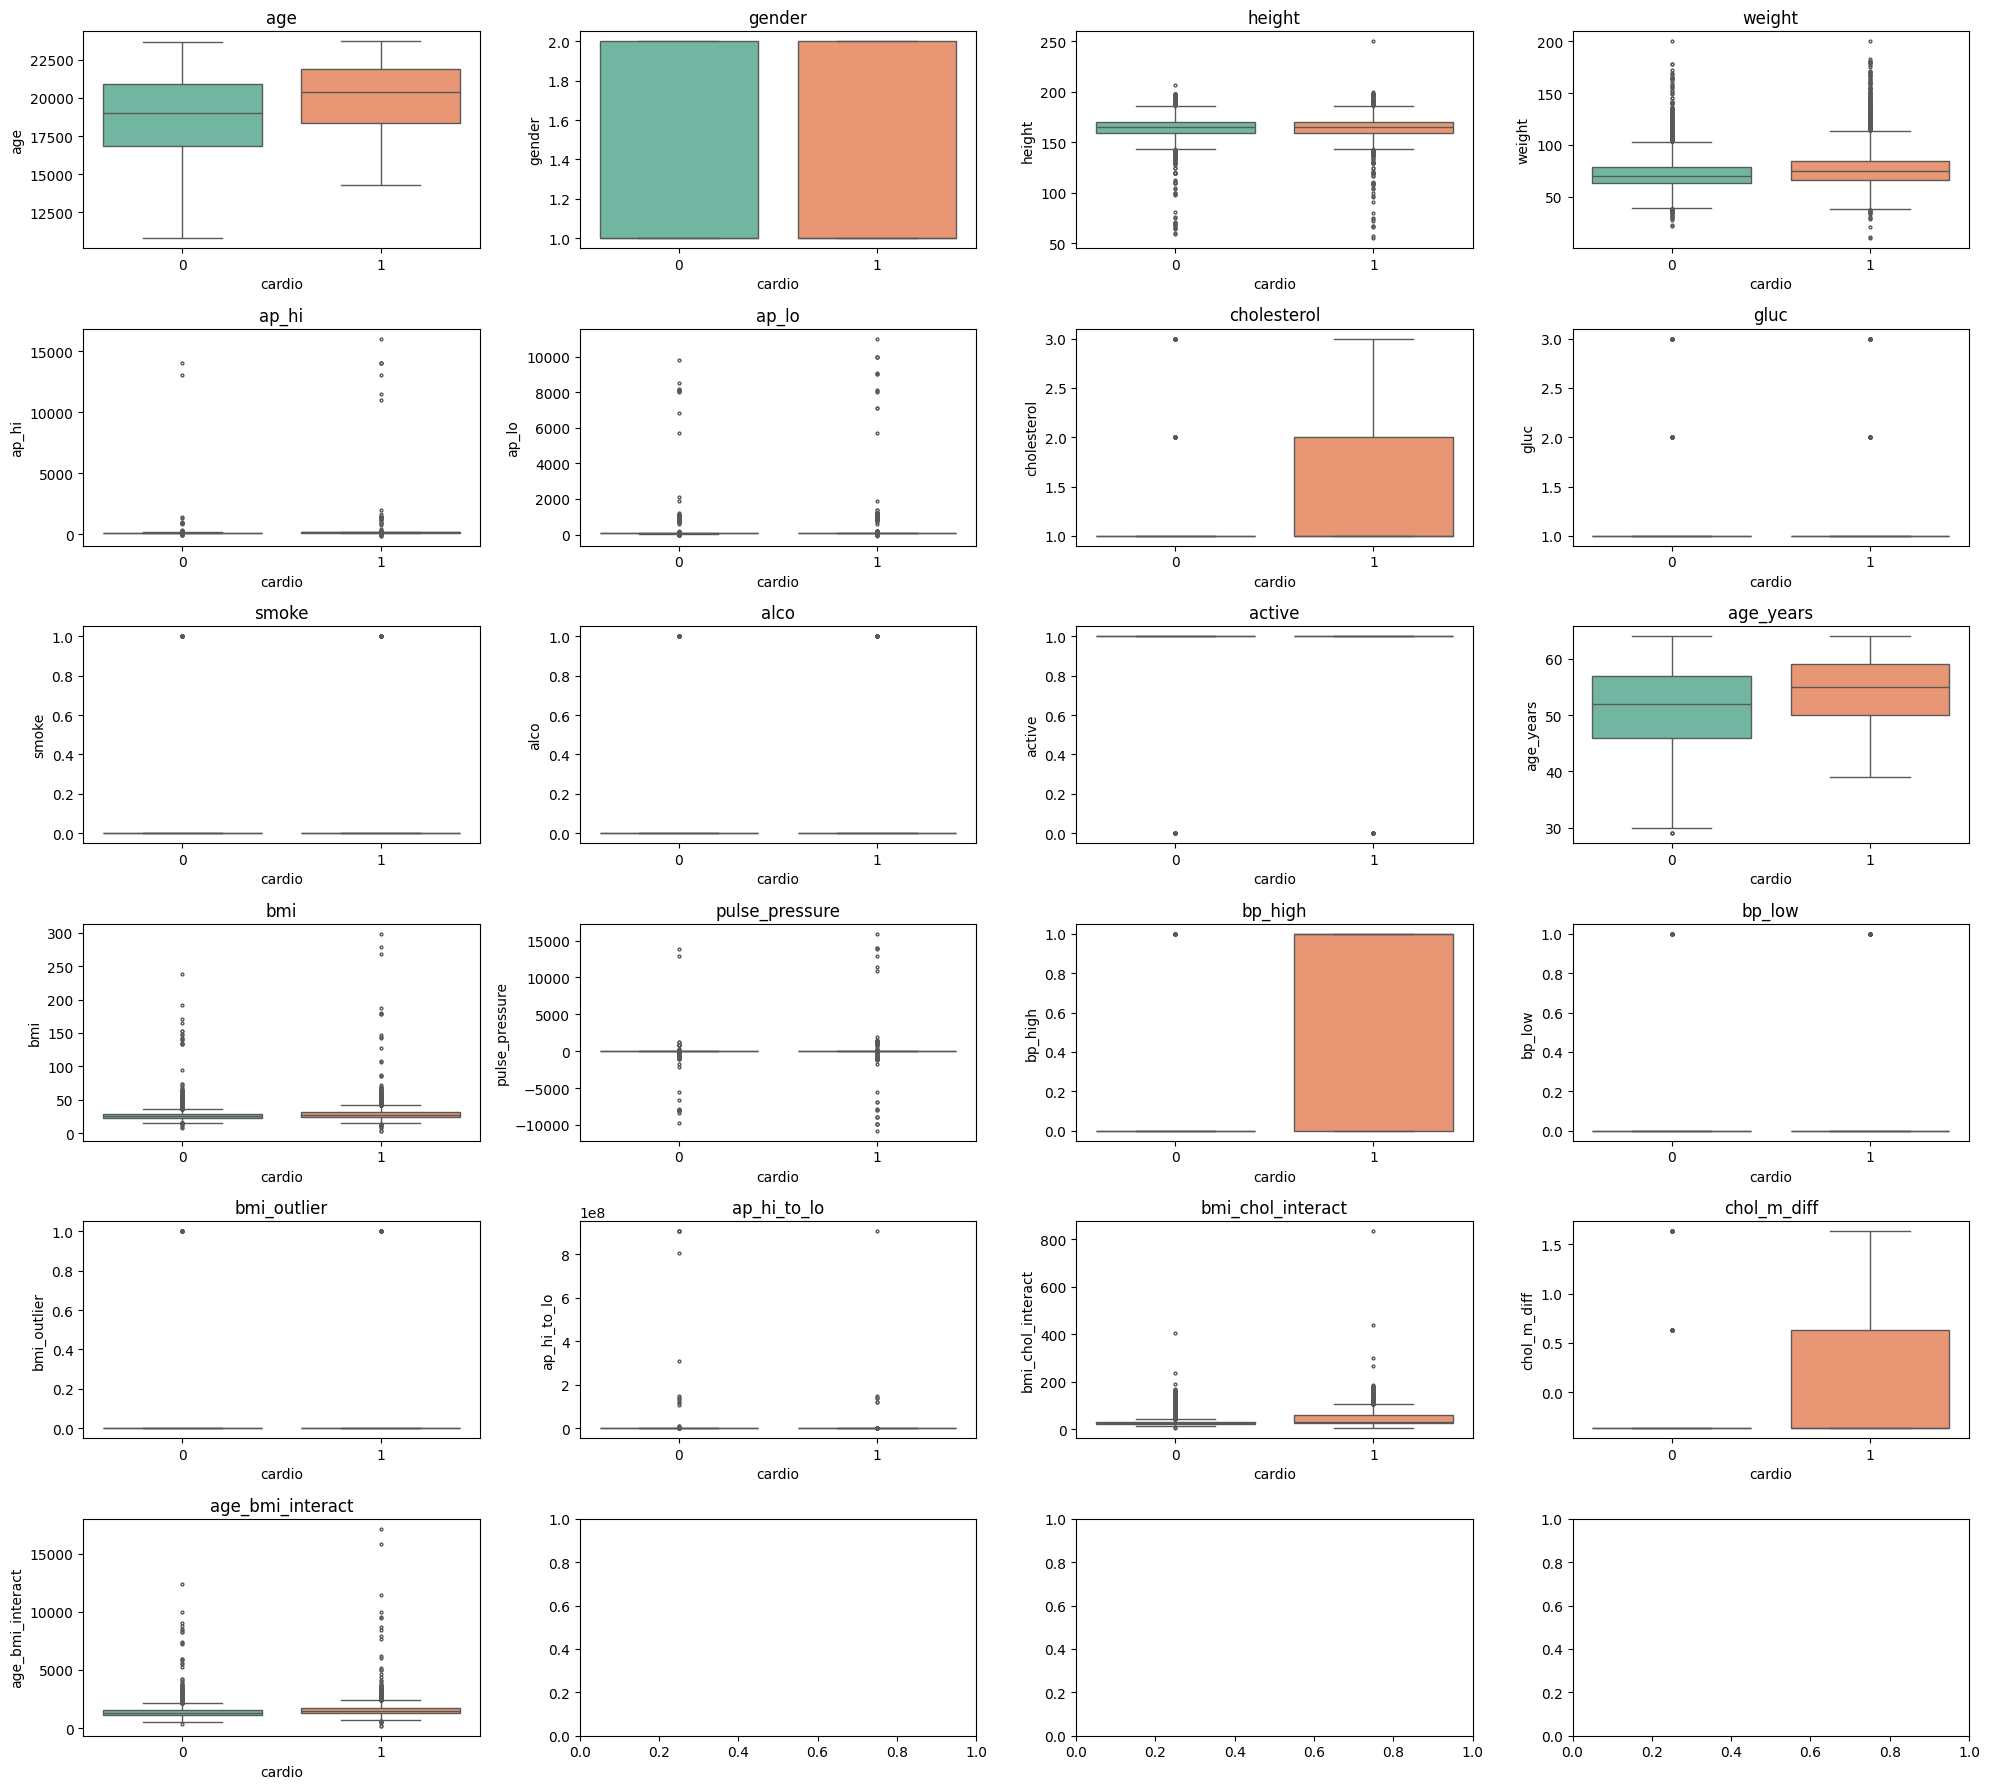

In [17]:
leak_check_features = [col for col in train.columns if col not in ['id', 'cardio']]
fig, axes = plt.subplots(len(leak_check_features) // 4 + 1, 4, figsize=(20, 3 * (len(leak_check_features) // 4 + 1)))
axes = axes.flatten()
for i, col in enumerate(leak_check_features):
    sns.boxplot(data=train, x='cardio', y=col, ax=axes[i], palette='Set2', fliersize=2)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [18]:
train.shape


(70000, 23)

In [19]:
train.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'pulse_pressure', 'bp_high', 'bp_low', 'bmi_outlier',
       'ap_hi_to_lo', 'bmi_chol_interact', 'chol_m_diff', 'age_bmi_interact'],
      dtype='object')

In [20]:
test.columns


Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')